<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/Standardize_your_data_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
# Uncomment this command before first run, then restart the runtime comment it again before running all the cells.

#! pip install plotly --upgrade

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis 
- 'speechiness' on Y axis
- 'genre' in hue

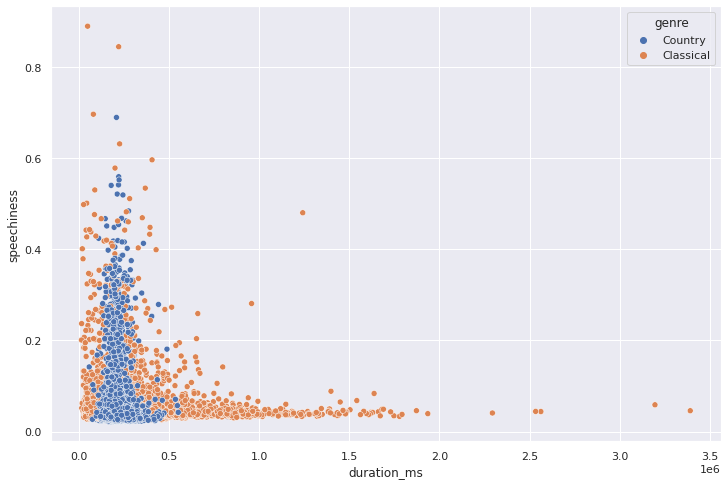

In [ ]:
# Your code here :
sns.set_theme()
fig = plt.figure(figsize=(12,8))

sns.scatterplot(data=df_zoom, x='duration_ms', y='speechiness', hue='genre')

plt.show()


In [ ]:
fig = px.scatter(df_zoom, x='duration_ms', y='speechiness', color='genre')

fig.update_layout(autosize=False, template='plotly_dark')
fig.show()

## Classification
From df_zoom : 
- define X (`duration_ms` and `speechiness`) 
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [ ]:
# Your code here :

cols = ['duration_ms', 'speechiness']

X = df_zoom[cols]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size = 0.75)

In [ ]:
# Logistic Regression

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {round(modelLR.score(X_train, y_train), 5)}")
print(f"Accuracy score on the test dataset: {round(modelLR.score(X_test, y_test), 5)}")

Accuracy score on the train dataset: 0.51875
Accuracy score on the test dataset: 0.50982


In [ ]:
# KNN

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {round(modelKNN.score(X_train, y_train), 5)}")
print(f"Accuracy score on the test dataset: {round(modelKNN.score(X_test, y_test), 5)}")

Accuracy score on the train dataset: 0.79799
Accuracy score on the test dataset: 0.71295


In [ ]:
# Decision Tree

modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

print(f"Accuracy score on the train dataset: {round(modelDTC.score(X_train, y_train), 5)}")
print(f"Accuracy score on the test dataset: {round(modelDTC.score(X_test, y_test), 5)}")

Accuracy score on the train dataset: 0.99978
Accuracy score on the test dataset: 0.73527



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [ ]:
# Your code here :

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Logistic Regression

modelLR = LogisticRegression()
modelLR.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {round(modelLR.score(X_train_scaled, y_train), 5)}")
print(f"Accuracy score on the test dataset: {round(modelLR.score(X_test_scaled, y_test), 5)}")

Accuracy score on the train dataset: 0.65781
Accuracy score on the test dataset: 0.66674


In [ ]:
# KNN

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {round(modelKNN.score(X_train_scaled, y_train), 5)}")
print(f"Accuracy score on the test dataset: {round(modelKNN.score(X_test_scaled, y_test), 5)}")

Accuracy score on the train dataset: 0.83646
Accuracy score on the test dataset: 0.77433


In [ ]:
# Decision Tree

modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train_scaled, y_train)

print(f"Accuracy score on the train dataset: {round(modelDTC.score(X_train_scaled, y_train), 5)}")
print(f"Accuracy score on the test dataset: {round(modelDTC.score(X_test_scaled, y_test), 5)}")

Accuracy score on the train dataset: 0.99978
Accuracy score on the test dataset: 0.73973


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.